In [35]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the extended SIR model

## Functions

In [36]:
# describe the model
def deriv(y, t, N, beta, k, delta):
    #TODO: check that every derivative is correct
    S, E, I, R, D, H = y                  #[susceptible, exposed, infected, recovered, deceased, hospital]
    dSdt = (-beta * S * I / N) + ((1/30)*R/N) #susceptible
    dEdt = beta * S * I / N - delta * E   #exposed
    dIdt = delta * E - k * I              #infected
    dHdt = h * I - k * H                  #hospital
    dRdt = (1-d) * k * I                  #recovered
    dDdt = d * k * I                      #deceased

    return dSdt, dEdt, dIdt, dRdt, dDdt, dHdt

In [37]:
def plotsir(t, S, E, I, R, D, H):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, H, 'c', alpha=0.7, linewidth=2, label='In need of hospital(ICU)')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'black', alpha=0.7, linewidth=2, label='Deceased')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

## Parameters and Plot

**N** is the population. 

**delta** represents the time from exposure to symptoms, the incubation period. This is between 1-14 days and on average 5-6 days, according to the World Health Organization(WHO). 

**k** is the number of days that a subject is infected.

**d** is the mortality rate. Data from Johns Hopkins University suggest that 2% is a reasonable number. ([See this site](https://coronavirus.jhu.edu/data/mortality) 

**h** is the percentage of the people who have contracted that needs an Intensive Care Unit(ICU). 15% of the infected needs some kind of hospital care, for example oxygen, according to WHO. 5% of the infected needs ICU according to WHO. We have choosen to only include ICU in the "hospital" category as those patients need a considerable amount of medical resources.



In [38]:
# describe the parameters
N =  10000000              #population
beta = 1.4                
delta = 1.0 / 6.0         #incubation period of 6 days
k = 1.0/7.0
d = 0.02                     #mortality
h = 0.03                     #percentage of infected that needs hospital             
S0, E0, I0, R0, D0, H0 = N-1, 1, 0, 0, 0, 0  # initial conditions: one exposed, rest susceptible

t = np.linspace(0, 149, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, H0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta))
S, E, I, R, D, H = ret.T


plot the graph

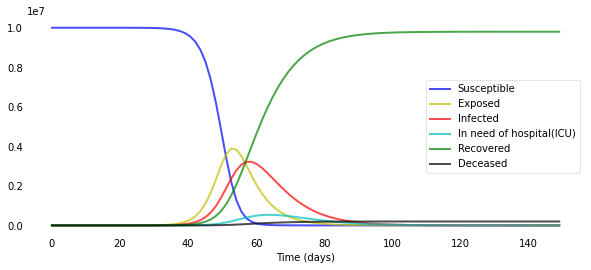

ICUs needed:  534524.1124385127
Deceased:  199987.86522934667


In [39]:

plotsir(t, S, E, I, R, D, H) 

ICUmax = H[0]
for i in H: 
  if ICUmax < i: 
    ICUmax = i

print("ICUs needed: ", ICUmax);
print("Deceased: ", D[-1]);

A future improvement/addition to this model could be to introduce a number of available ICU beds and if the number of people in need of ICU exceeds that number, the mortality is increased accordingly. 